In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [177]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [178]:
df_train = pd.read_csv("Xy_train.csv")
print(df_train.shape)

(100, 2)


In [179]:
x = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values
print(x.shape,y.shape)

(100, 1) (100,)


In [180]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_poly_train, x_poly_test = train_test_split(x, test_size=0.2, random_state=42)

In [181]:
# Definimos el escalador 
scaler = StandardScaler() # Pueden probar con otros
# Fiteamos para los x_train
scaler = scaler.fit(x_train)

In [182]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [183]:
# Aqui estamos agregando las features polinomicas LUEGO de escalar los datos
grad_poly = 7
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)
x_train_poly_scaled.shape

(80, 8)

### Gs y predicción con modelo lineal

In [184]:
est = SVR(max_iter=25000)
n_folds = 5
parameters = {'C' : [1,10,100],
             'gamma':[0.1,0.2,0.5],
             'kernel':['rbf', 'linear','poly']}
# Definimos el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [185]:
gs.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  38 out of 135 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=3)]: Done 135 out of 135 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=25000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=3,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.2, 0.5],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [186]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.2,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 100, 'gamma': 0.2, 'kernel': 'rbf'} 

-0.6119001192913643 



In [187]:
pred_linear = gs.best_estimator_
svr_prediction = pred_linear.predict(x_test_scaled)

In [188]:
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)

In [189]:
svr_mse

0.9490001040602335

## Polinomial Features

In [190]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_train_poly_scaled, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMa

/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMa

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'} 

-0.627345724462791 



/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/federicogirola/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMa

In [191]:
# Predecimos para el set polinomico
pred_poly = gs.best_estimator_
poly_linear_prediction = pred_poly.predict(x_test_poly_scaled)




In [192]:
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)

In [193]:
resultados = pd.DataFrame(columns = ['Modelo','Features','MSE'])

In [194]:
resultados

,Modelo,Features,MSE


In [195]:
resultados.append([{'Modelo':'SVR','Features':'Linear','MSE':svr_mse},{'Modelo':'SVR','Features':'Polynomial','MSE':poly_linear_mse}],ignore_index=True)


,Modelo,Features,MSE
0,SVR,Linear,0.949000
1,SVR,Polynomial,0.783675


MSE: 0.949000


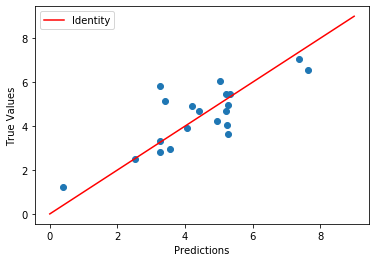

In [196]:
#Vamos a plotear Predictions vs True values
plt.scatter(svr_prediction, y_test)
plt.plot(np.arange(0,10),np.arange(0,10), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()

print(f'MSE: {svr_mse:.6f}')

MSE: 0.949000


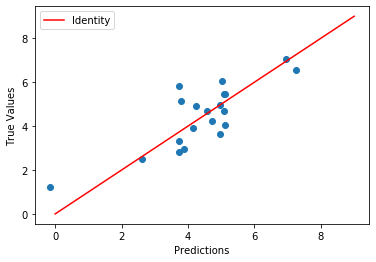

In [197]:
#Vamos a plotear Predictions vs True values
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,10),np.arange(0,10), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()

print(f'MSE: {svr_mse:.6f}')

# Predicciones
## Primero con SVR y features lineales

In [221]:
test = pd.read_csv('X_test.csv')

In [222]:
sc = StandardScaler()

In [223]:
test_scaled = sc.fit_transform(test)

In [224]:
svr_prediction = pred_linear.predict(test_scaled)

In [225]:
svr_prediction

array([ 3.68828198,  3.57924831,  5.26403372,  3.6297161 ,  4.26837439,
        3.40441465,  4.78858961, -3.04088958,  6.52414373,  4.21271357,
        4.99680926,  3.49408348,  6.64609332, -1.29268778,  5.10784068,
        4.04827165,  4.88657464,  3.83167249,  3.25058216,  3.59687433])

## Ahora con SVR y features polinómicos

In [215]:
test_poly = PolynomialFeatures(grad_poly).fit_transform(test)

In [216]:
sc = StandardScaler()

In [217]:
test_poly_scaled = sc.fit_transform(test_poly)

In [218]:
svr_poly_pred = pred_poly.predict(test_poly_scaled)

In [219]:
svr_poly_pred

array([3.72441093, 3.73177926, 4.62160887, 4.67503902, 4.52516728,
       3.75640781, 4.48400536, 5.8982388 , 4.9731826 , 4.53924716,
       4.30317547, 3.74113869, 5.00686937, 5.57798745, 3.86260489,
       4.25361689, 3.80866347, 3.72019674, 3.8714914 , 3.7302836 ])